In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_zoo=pd.read_csv('/content/zoo.csv')
data_class=pd.read_csv('/content/class.csv')

data_zoo.animal_name.value_counts().count()
data_zoo.class_type.value_counts().count()

display(data_zoo.head())
display(data_class)

class_types = list(data_class['Class_Type'])
class_types

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X=data_zoo.iloc[:,1:-1]
y=data_zoo.iloc[:,-1]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [ ]:
data_zoo[data_zoo.duplicated()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type


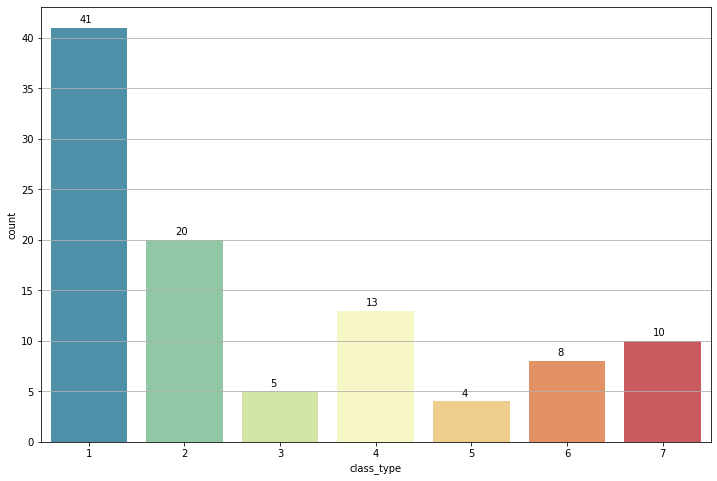

In [ ]:
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='class_type', data=data_zoo, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

(17.5, -0.5)

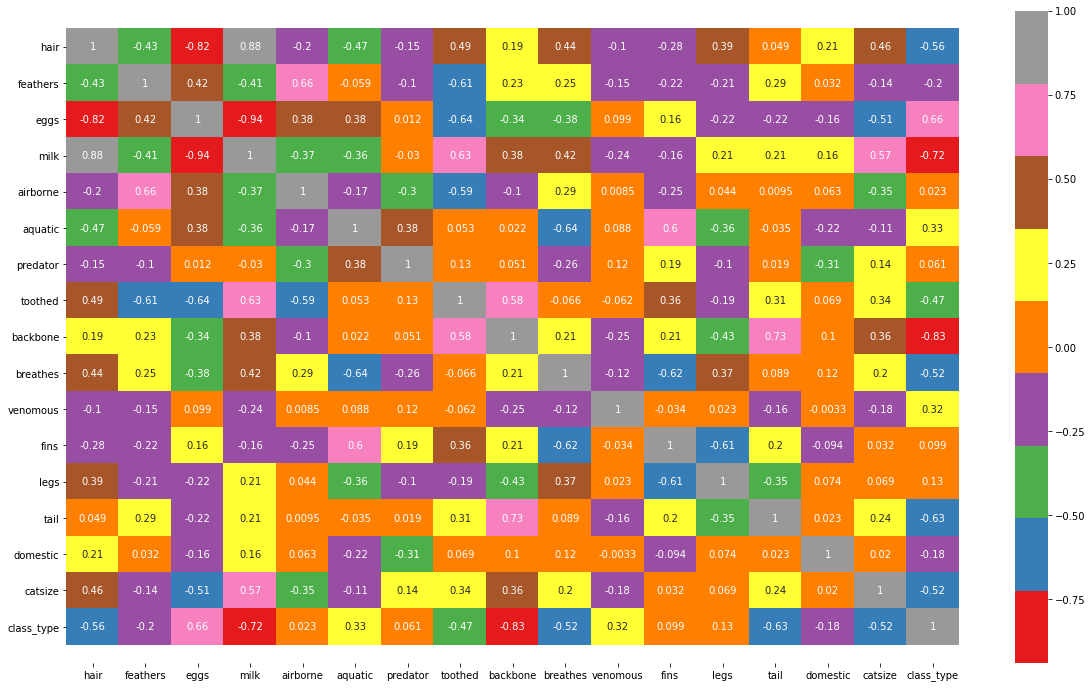

In [ ]:
corr_matirx=df.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

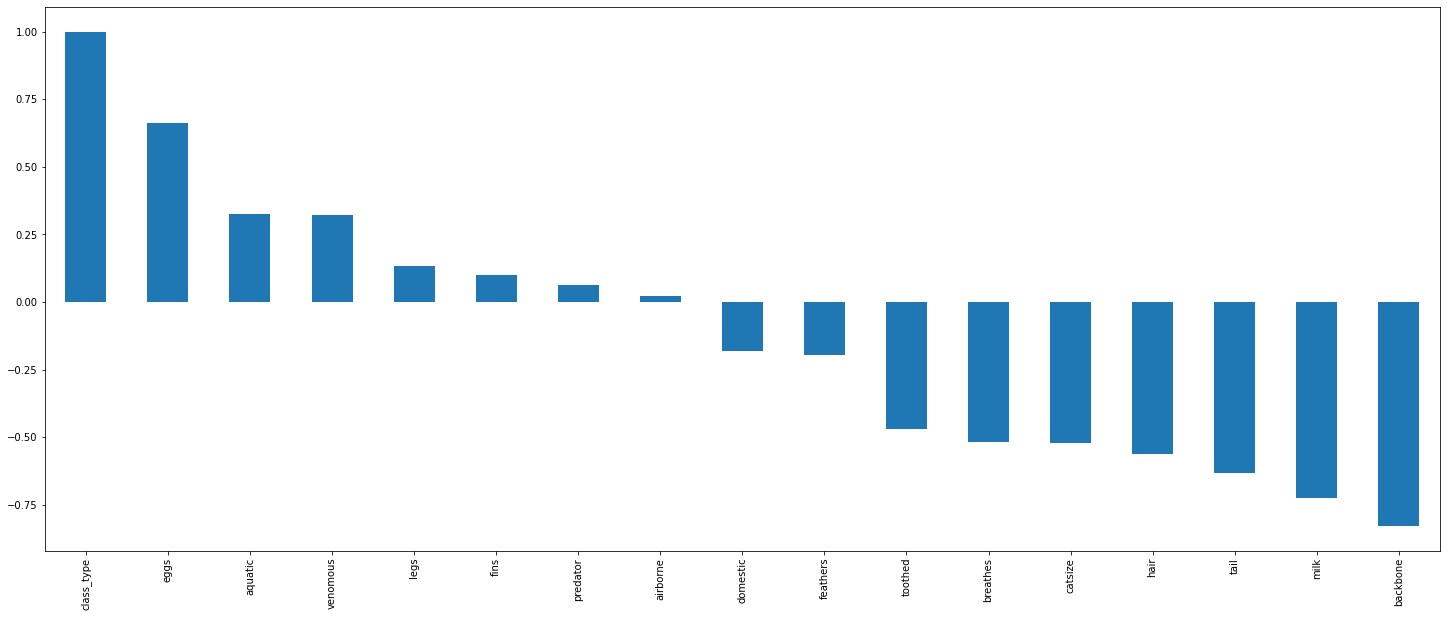

In [ ]:
plt.figure(figsize=(25,10))
df.corr()['class_type'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### Support Vector Machine

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=2,stratify=y)
model=SVC()
model.fit(x_train,y_train)
print(f' Training Accuracy {model.score(x_train,y_train)}')
f'Test Accuracy {model.score(x_test,y_test)}'

 Training Accuracy 0.9571428571428572


'Test Accuracy 0.9354838709677419'

### KNN

0.9354838709677419


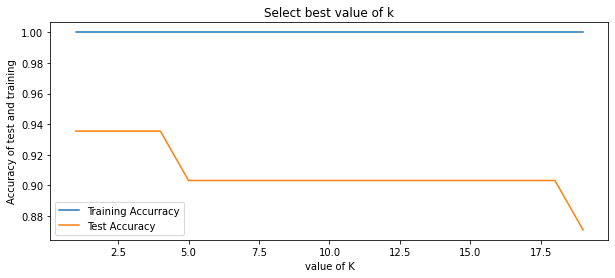

In [ ]:
k = range(1,20)
trainingAccuracy = []
testAccuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=15,p=1,weights='distance')
    knn.fit(x_train,y_train)
    trainingacc = knn.score(x_train,y_train)
    trainingAccuracy.append(trainingacc)
    testAccuracy.append(knn.score(x_test,y_test))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.xlabel("value of K")
plt.ylabel("Accuracy of test and training")
plt.title("Select best value of k")
plt.plot(k,trainingAccuracy)
plt.plot(k,testAccuracy)
  #axes[0].legend(['loss','val_loss'])
axes.legend(["Training Accurracy","Test Accuracy"])
print(max(testAccuracy)) # with K value as 4

In [ ]:
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]
pe=[1,2]

param_grid = dict(n_neighbors = k_range, weights = weight_options,p=pe)
knn = KNeighborsClassifier()

knngrid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy',n_jobs=15)
knngrid.fit(x_train,y_train)

print ("Best score on 10 folds split Data on Train split:- ",knngrid.best_score_)
print ("Best Param:- ",knngrid.best_params_)
print ("Best KNN Metric:- ", knngrid.best_estimator_)

print(f' Training Accuracy {knngrid.score(x_train,y_train)}')
f'Test Accuracy {knngrid.score(x_test,y_test)}'

Best score on 10 folds split Data on Train split:-  0.9714285714285715
Best Param:-  {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best KNN Metric:-  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')
 Training Accuracy 1.0


'Test Accuracy 0.9354838709677419'

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 3,n_jobs=15,p=1,weights='distance')
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.9354838709677419

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_jobs=15,n_neighbors=3,p=1,weights='distance')
knn_model.fit(x_train,y_train)
print(f' Training Accuracy {knn_model.score(x_train,y_train)}')
f' Testing Accuracy {knn_model.score(x_test,y_test)}'

 Training Accuracy 1.0


' Testing Accuracy 0.9354838709677419'

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

log_model.fit(x_train, y_train)

print(f' Training Accuracy {log_model.score(x_train,y_train)}')
f'Test Accuracy {log_model.score(x_test,y_test)}'

 Training Accuracy 1.0


'Test Accuracy 0.9354838709677419'

### Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(64, 64))

nn_model.fit(x_train, y_train)
print(f' Training Accuracy {nn_model.score(x_train,y_train)}')
f'Test Accuracy {nn_model.score(x_test,y_test)}'

 Training Accuracy 1.0


'Test Accuracy 0.9354838709677419'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import GridSearchCV
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],            
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=folds,
                           scoring='accuracy',n_jobs=-1,verbose = 1,
)
clf.fit(x_train, y_train)

print(f' Training Accuracy {clf.score(x_train,y_train)}')
f'Test Accuracy {clf.score(x_test,y_test)}'


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


 Training Accuracy 1.0


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.5s finished


'Test Accuracy 0.9354838709677419'

In [ ]:
#cv_results = pd.DataFrame(clf.cv_results_)
#cv_results[cv_results.rank_test_score<5]
#print the optimum value of hyperparameters
print('Best hyperparameters: ', clf.best_params_)

Best hyperparameters:  {'activation': 'relu', 'solver': 'lbfgs'}
